# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# 1 Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as td
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
#2 Visit the website
#3 https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
#4 Create a Beautiful Soup Object
# Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
soup = BeautifulSoup(html, 'html.parser')

In [5]:
#5 Extract all rows of data
Mars_Facts_df = pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")

In [6]:
print(Mars_Facts_df)

[        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Find the table containing the data
mars_table = soup.find('table')

if mars_table:
    # Extract the data from the table
    data = []
    rows = mars_table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)

    # Create a DataFrame from the extracted data with specified column headings
    Mars_Facts_df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
    print(Mars_Facts_df)
else:
    print("Table not found on the page.")

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


In [11]:
# 7Loop through the scraped data to create a list of rows
# Iterate through your data and create a dictionary for each row

Mars_Facts_rows = []

for index, row in Mars_Facts_df.iterrows():
    Mars_Facts_row = {
        'id': row['id'],
        'terrestrial_date': row['terrestrial_date'],
        'sol': row['sol'],
        'ls': row['ls'],
        'month': row['month'],
        'min_temp': row['min_temp'],
        'pressure': row['pressure']
    }
    Mars_Facts_rows.append(Mars_Facts_row)

# Create a new DataFrame from the list of rows
Mars_Facts_df = pd.DataFrame(Mars_Facts_rows)

In [14]:
#8 Create a Pandas DataFrame by using the list of rows and a list of the column names
# Check the DataFrame
Mars_Facts_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
#10 Examine data type of each column
column_data_types = Mars_Facts_df.dtypes

print(column_data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [17]:
# 11Change data types for data analysis

# Drop rows with missing 'id' values
Mars_Facts_df = Mars_Facts_df.dropna(subset=['id'])

# Convert columns to the desired data types
Mars_Facts_df['id'] = Mars_Facts_df['id'].astype('int64')
Mars_Facts_df['terrestrial_date'] = pd.to_datetime(Mars_Facts_df['terrestrial_date'])
Mars_Facts_df['sol'] = Mars_Facts_df['sol'].astype('int64')
Mars_Facts_df['ls'] = Mars_Facts_df['ls'].astype('int64')
Mars_Facts_df['month'] = Mars_Facts_df['month'].astype('int64')
Mars_Facts_df['min_temp'] = Mars_Facts_df['min_temp'].astype('float64')
Mars_Facts_df['pressure'] = Mars_Facts_df['pressure'].astype('float64')


C:\Users\Owner\AppData\Local\Temp\ipykernel_23360\800223853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mars_Facts_df['id'] = Mars_Facts_df['id'].astype('int64')
C:\Users\Owner\AppData\Local\Temp\ipykernel_23360\800223853.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mars_Facts_df['terrestrial_date'] = pd.to_datetime(Mars_Facts_df['terrestrial_date'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_23360\800223853.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [18]:
#12 Confirm type changes were successful by examining data types again

#print(Mars_Facts_df.dtypes)

In [20]:
Mars_Facts_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
#13 1. How many months are there on Mars?
# Calculate the number of unique months on Mars
# Assuming Mars_Facts_df is your DataFrame
num_months_count = Mars_Facts_df['month'].value_counts().sort_index()

print("Number of months on Mars:")
print(num_months_count)


Number of months on Mars:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [22]:
#14 2. How many Martian days' worth of data are there?
# Assuming Mars_Facts_df is your DataFrame
num_martian_days = Mars_Facts_df['sol'].nunique()

print("Number of Martian days':", num_martian_days)

Number of Martian days': 1867


In [23]:
#15 3. What is the average low temperature by month?
# Assuming Mars_Facts_df is your DataFrame
average_low_temp_by_month = Mars_Facts_df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(average_low_temp_by_month)

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [24]:
# Assuming Mars_Facts_df is your DataFrame
# Calculate the average minimum daily temperature for all months
average_temp_by_month = Mars_Facts_df.groupby('month')['min_temp'].mean()


# Find the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month: 3
Hottest month: 8


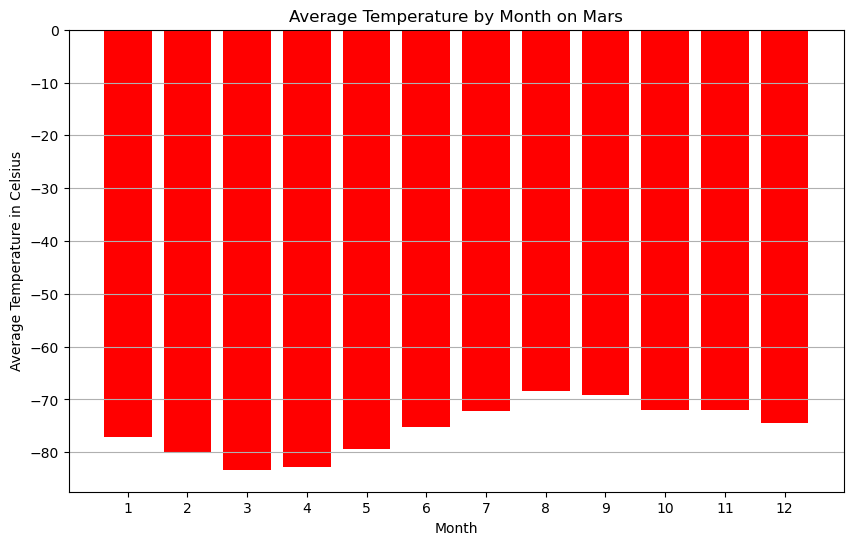

In [25]:
# 16Plot the average temperature by month

average_temp_by_month = Mars_Facts_df.groupby('month')['min_temp'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_temp_by_month.index, average_temp_by_month.values, color='red')
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celsius')
plt.title('Average Temperature by Month on Mars')
plt.xticks(range(1, 13))  # Assuming months are represented as 1 to 12
plt.grid(axis='y')
plt.show()

In [26]:
#############################
#17 Identify the coldest and hottest months in Curiosity's location

##############################

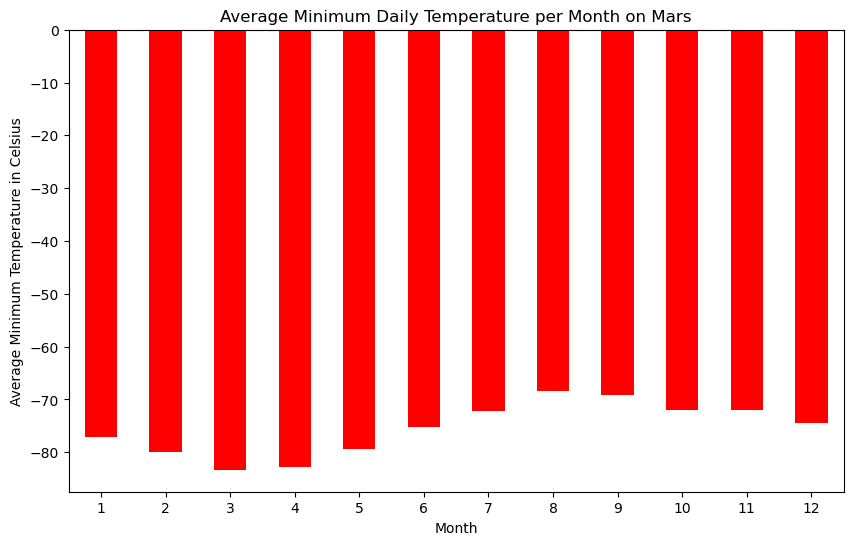

In [27]:
# Calculate the average minimum daily temperature for each month
average_min_temp_per_month = Mars_Facts_df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = average_min_temp_per_month.idxmin()
warmest_month = average_min_temp_per_month.idxmax()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
average_min_temp_per_month.plot(kind='bar', color='r')
plt.title('Average Minimum Daily Temperature per Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature in Celsius')
plt.xticks(rotation=0)
plt.axhline(y=0, color='gray', linestyle='--')  # Add a horizontal line at 0°C

plt.show()

In [28]:
#18 4. Average pressure by Martian month
# Convert the list to a DataFrame
Mars_Facts_df = pd.DataFrame(Mars_Facts_df, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Calculate the average pressure by Martian month
average_pressure_by_month = Mars_Facts_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print("Average Pressure by month:")
print(average_pressure_by_month)

Average Pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


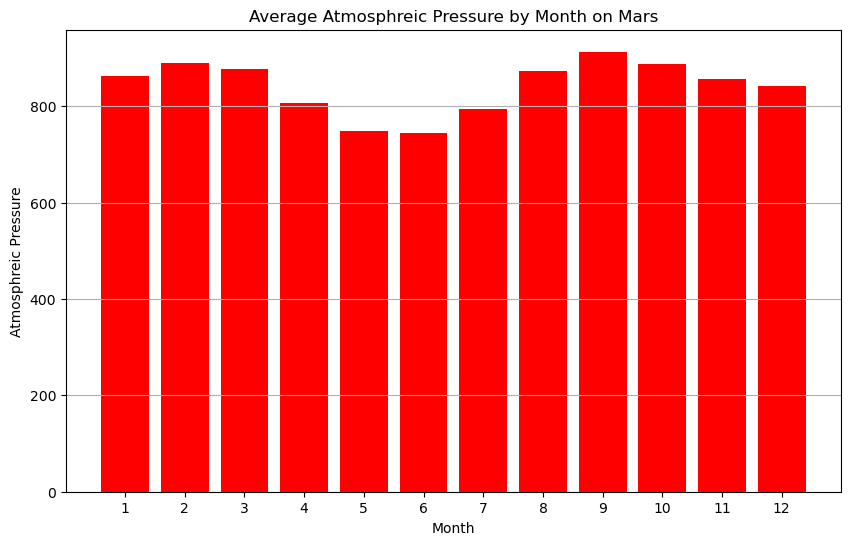

In [29]:
#19 Plot the average pressure by month
average_pressure_by_month = Mars_Facts_df.groupby('month')['pressure'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_temp_by_month.index, average_pressure_by_month.values, color='red')
plt.xlabel('Month')
plt.ylabel('Atmosphreic Pressure')
plt.title('Average Atmosphreic Pressure by Month on Mars')
plt.xticks(range(1, 13))  # Assuming months are represented as 1 to 12
plt.grid(axis='y')
plt.show()

In [30]:
###################################################
#20 5. How many terrestrial (earth) days are there in a Martian year?
Mars_Facts_df['terrestrial_date'] - np.datetime64('2012-08-16')

###################################################

1         0 days
2         1 days
3         2 days
4         3 days
5         4 days
          ...   
1863   2017 days
1864   2018 days
1865   2019 days
1866   2020 days
1867   2021 days
Name: terrestrial_date, Length: 1867, dtype: timedelta64[ns]

In [31]:
earth_days = Mars_Facts_df['terrestrial_date'] - np.datetime64('2012-08-16')

In [33]:
Mars_Facts_df['earth_days']=earth_days
Mars_Facts_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,earth_days
1,2,2012-08-16,10,155,6,-75.0,739.0,0 days
2,13,2012-08-17,11,156,6,-76.0,740.0,1 days
3,24,2012-08-18,12,156,6,-76.0,741.0,2 days
4,35,2012-08-19,13,157,6,-74.0,732.0,3 days
5,46,2012-08-20,14,157,6,-74.0,740.0,4 days
...,...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0,2017 days
1864,1892,2018-02-24,1974,134,5,-77.0,729.0,2018 days
1865,1894,2018-02-25,1975,134,5,-76.0,729.0,2019 days
1866,1893,2018-02-26,1976,135,5,-77.0,728.0,2020 days


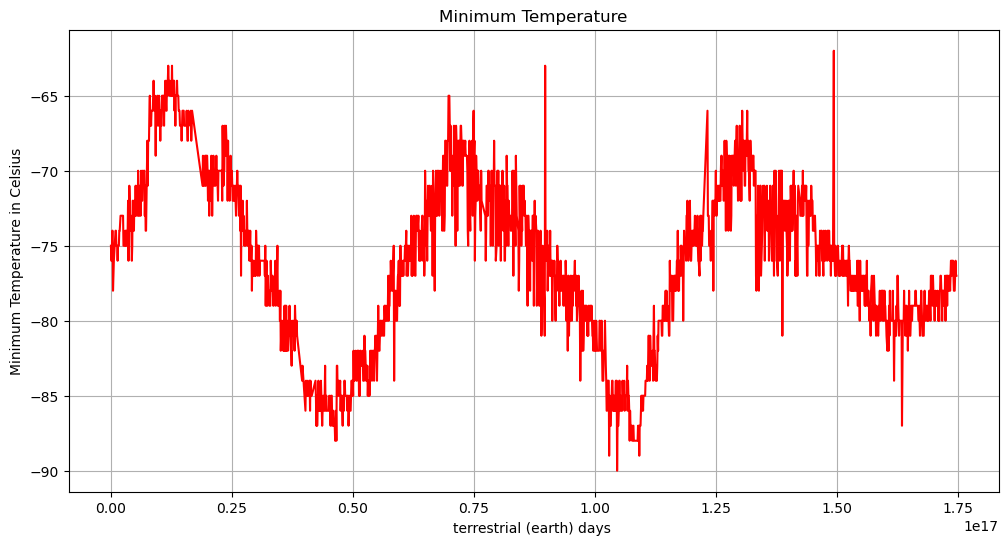

In [34]:
# Plot the daily minimum temperature against the days since the beginning of the dataset
plt.figure(figsize=(12, 6))
plt.plot(Mars_Facts_df['earth_days'], Mars_Facts_df['min_temp'], color='r')
plt.title('Minimum Temperature')
plt.xlabel('terrestrial (earth) days ')
plt.ylabel('Minimum Temperature in Celsius')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
#21 Write the data to a CSV
Mars_Facts_df.to_csv('mars_facts.csv', index=False)

print("DataFrame 'Mars_Facts_df' exported to CSV successfully.")

DataFrame 'Mars_Facts_df' exported to CSV successfully.


In [37]:
browser.quit()